In [1]:
from IPython.display import Image
import ee
import shapefile
import numpy as np
ee.Initialize()

In [2]:
#x1=82.00
#y1=16.00
#x2=96.00
#y2=26.00
#[[88.993755,22.481707],[89.874084,22.481707],[89.874084,21.720598],[88.993755,21.720598],[88.993755,22.481707]]
x1=88.993755
y1=22.481707
x2=89.874084
y2=21.720598
polygon1 = [[x1,y1],[x2,y1],[x2,y2],[x1,y2],[x1,y1]]
bd=[[26.595400,88.401549],[25.814693,88.115625],[25.292865,89.014446],[24.674865,88.041039],[21.685379,89.094864],[21.295222,92.640797],[23.690003,92.265045],[22.945747,91.575422],[23.944494,91.213806],[25.009897,92.385592],[25.253268,89.859716],[26.155146,89.739029]]
polygon=polygon1
geo=ee.Geometry.Polygon(polygon)
feat=ee.FeatureCollection(geo)
#print(lon_lat)

In [3]:
#import shapefile
#data=[[88.993755,22.481707],[89.874084,22.481707],[89.874084,21.720598],[88.993755,21.720598],[88.993755,22.481707]]
#for i in data:
#w = shapefile.Writer('shapefiles/sb/sb')#,shapefile.POLYGON)
#w.field('name','C')
#w.poly([data])
#w.record('Polygon')
#w.close()

In [6]:
import pandas as pd
#MODIS/051/MCD12Q1
#MODIS/006/MCD15A3H
#'LANDSAT/LC8_L1T_TOA'
data='MODIS/006/MCD15A3H'
landsat8_collection = ee.ImageCollection(data)
landsat8_collection_dt=landsat8_collection.filterDate('2000-01-01', '2006-01-01')
final_coll=landsat8_collection_dt
lst_img=final_coll.toList(final_coll.size())
images=[]
n=(final_coll.size().getInfo())
#image2 = image1.select(['Land_Cover_Type_1'])
print(n)

320


In [7]:
#image1=ee.Image(lst_img.get(0))
#image2=ee.Image(lst_img.get(1))
#img=ee.Image.add(image1,image2)
#img=ee.Image.divide(img,2)

In [8]:
root='sb_modis_Lai_2005_18/'

In [11]:
names=[]
for i in range(n):
        image=ee.Image(lst_img.get(i))
        images.append(image)
        inf=images[i].getInfo()
        id_img=inf['id']
        name=id_img.split('/')[-1]
        names.append(name)
        print(name)
print(names[:])

2002_07_04
2002_07_08
2002_07_12
2002_07_16
2002_07_20
2002_07_24
2002_07_28
2002_08_05
2002_08_09
2002_08_13
2002_08_17
2002_08_21
2002_08_25
2002_08_29
2002_09_02
2002_09_06
2002_09_10
2002_09_14
2002_09_18
2002_09_22
2002_09_26
2002_09_30
2002_10_04
2002_10_08
2002_10_12
2002_10_16
2002_10_20
2002_10_24
2002_10_28
2002_11_01
2002_11_05
2002_11_09
2002_11_13
2002_11_17
2002_11_21
2002_11_25
2002_11_29
2002_12_03
2002_12_07
2002_12_11
2002_12_15
2002_12_19
2002_12_23
2002_12_27
2002_12_31
2003_01_01
2003_01_05
2003_01_09
2003_01_13
2003_01_17
2003_01_21
2003_01_25
2003_01_29
2003_02_02
2003_02_06
2003_02_10
2003_02_14
2003_02_18


KeyboardInterrupt: 

In [ ]:
f=open(root+'names_00-06.csv','w')
for name in names:   
    f.write(name)
    f.write('\n')
f.close()

In [18]:
import pickle

pickle_out = open(root+"images_00_06.pickle","wb")
pickle.dump(images, pickle_out)
pickle_out.close()

pickle_out = open(root+"names_00_06.pickle","wb")
pickle.dump(names, pickle_out)
pickle_out.close()




In [19]:
from IPython.display import Image
import ee
import shapefile
import numpy as np
ee.Initialize()
import pickle
pickle_out = open(root+"names_00_06.pickle","rb")
names=pickle.load(pickle_out)
pickle_out.close()
pickle_out = open(root+"images_00_06.pickle","rb")
images=pickle.load(pickle_out)
pickle_out.close()
n=len(names)
print(n)

320


In [ ]:
im=images[0]#.clip(feat)
inf=im.getInfo()
print(inf['properties']['system:footprint']['coordinates'])

[[-180.0, -90.0], [180.0, -90.0], [180.0, 90.0], [-180.0, 90.0], [-180.0, -90.0]]


In [ ]:
#date=name.split('_')[-1]
#year=date[:4]
#month=date[4:6]
#day=date[6:]
#print(name,year,month,day)
#print(inf.keys())
#print(inf['version'])-

In [ ]:
import requests,urllib
for i in range(n):
    image_a=images[i]
    #tct = tasseled_cap_transformation(images[i])
    #tct_g=tct.select('greenness')
    image = image_a.clip(feat)
    path = image.getDownloadUrl({
        'scale': 250,
        'crs': 'EPSG:4326',#WGS84
        'region':polygon
        })
    print(i)
    res=urllib.request.urlopen(path)
    f=open(root+str(i)+'.zip','wb')
    f.write(res.read())
    f.close()
#request = urllib2.Request(self.url)
#pic = urllib2.urlopen(request)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


In [12]:
import zipfile
for i in range(n):
    print(i)
    with zipfile.ZipFile(root+str(i)+'.zip', 'r') as zip_ref:
        zip_ref.extractall(root)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

FileNotFoundError: [Errno 2] No such file or directory: 'sb_modis/828.zip'

In [5]:
f=open(root+'names_all.csv','r')
lines =f.read()
names=lines.split('\n')
f.close()
print(len(names))

1279


In [6]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np


In [1]:
qcs=[]
lai=[]
fapr=[]
qc_names=[]
for name in names:
    if len(name)==0:
        break
    _name=name#+'.Nadir_Reflectance'
    blue=Image.open(root+_name+'.Fpar.tif')
    blue=np.array(blue,dtype=np.uint8)
    green=Image.open(root+_name+'.Lai.tif')
    green=np.array(green,dtype=np.uint8)
    red=Image.open(root+_name+'.FparLai_QC.tif')
    red=np.array(red,dtype=np.uint8)
    #blue=blue*0
    sp=red.shape
    mask=np.ones((sp[0],sp[1]),dtype=np.uint8)
    mask=mask*24
    red=np.bitwise_and(red,mask)
    blue[green>100]=0
    green[green>100]=0

    
    dt=name.split('_')
    month=dt[1]
    if int(month)>=3 and int(month)<=10:
        continue
    qc=np.mean(red)
    #if qc>15:
    #    continue
    qcs.append(qc)
    lai.append(np.mean(green))
    fapr.append(np.mean(blue))
    qc_names.append(name)
    img=np.zeros((sp[0],sp[1],3),dtype=np.uint8)
    red=red*0
    blue=blue*0
    #red[green>248]=255
    img[:,:,0]=np.uint8(blue)
    img[:,:,1]=np.uint8(green*2.5)
    img[:,:,2]=np.uint8(red)
    img[img<-500]=0
    #img=np.uint8(img*255)
    #plt.imshow(img)
    #plt.show()
    cv2.imwrite(root+'img_no_cd/'+name+'.jpg',img)
    print(name,names.index(name))
    print(np.max(img))
    print(np.shape(img))
#print('mean_qc',np.mean(qcs))

NameError: name 'names' is not defined

In [202]:
print(len(qc_names))

1278


In [203]:
import datetime
times=[]
n_times=[]
for name in qc_names:
    if len(name)==0:
        break
    dt=name.split('_')
    time=datetime.datetime(int(dt[0]),int(dt[1]),int(dt[2]))
    times.append(time)
    
    dtt=int(int(dt[0])%2000)+(int(dt[1])/100)+(int(dt[2])/10000)
    dtt=int(dtt*10000)
    #dtt=np.around(dtt,decimals=4)
    n_times.append(dtt)
    #print(time,dtt)
print(n_times)

[50100, 50104, 50108, 50112, 50116, 50121, 50125, 50129, 50202, 50206, 50210, 50214, 50218, 50222, 50226, 50302, 50306, 50310, 50314, 50318, 50322, 50326, 50330, 50403, 50407, 50411, 50415, 50419, 50423, 50427, 50500, 50504, 50508, 50512, 50516, 50521, 50525, 50529, 50602, 50606, 50610, 50614, 50618, 50622, 50626, 50630, 50704, 50708, 50712, 50716, 50720, 50724, 50728, 50801, 50805, 50809, 50813, 50817, 50821, 50825, 50829, 50902, 50906, 50910, 50914, 50918, 50922, 50926, 50930, 51003, 51007, 51011, 51015, 51019, 51023, 51027, 51101, 51105, 51109, 51113, 51117, 51121, 51125, 51129, 51203, 51207, 51211, 51215, 51219, 51223, 51227, 51231, 60100, 60104, 60108, 60112, 60116, 60121, 60125, 60129, 60202, 60206, 60210, 60214, 60218, 60222, 60226, 60302, 60306, 60310, 60314, 60318, 60322, 60326, 60330, 60403, 60407, 60411, 60415, 60419, 60423, 60427, 60500, 60504, 60508, 60512, 60516, 60521, 60525, 60529, 60602, 60606, 60610, 60614, 60618, 60622, 60626, 60630, 60704, 60708, 60712, 60716, 60720

In [204]:
print(len(qcs))

1278


In [9]:
import pickle
import pandas as pd
n_times=np.array(range(0,len(qcs)))
df=pd.DataFrame([],index=times)
df['qc']=qcs
df['Lai']=lai
df['Fapr']=fapr
#pickle_out = open("df_mean_sb.pickle","wb")
#pickle.dump(df, pickle_out)
#pickle_out.close()


NameError: name 'qcs' is not defined

In [13]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
pickle_out = open("df_mean_sb.pickle","rb")
df=pickle.load(pickle_out)
pickle_out.close()

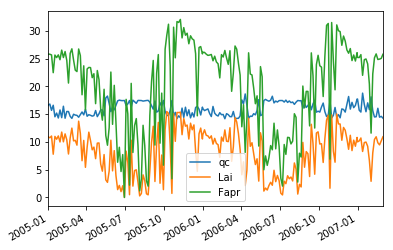

In [14]:
#df['qc']=qc_names

#df=df.rolling(window=50).mean()


df[:200].plot()
df.to_csv(root+'lai_fpar_all.csv',sep=',')
#print(df[:100])

In [193]:
#Define classification function
def classification(raster_input, training_dataset,number_of_training_points, region, classification_algorithm):
    bands = raster_input.bandNames()
    points = ee.FeatureCollection.randomPoints(region, number_of_training_points, number_of_training_points, 1)
    training = training_dataset.addBands(raster_input).reduceToVectors(
        reducer="mean",
        geometry=points,
        geometryType="centroid",
        scale=30, 
        crs="EPSG:4326"
    )

    classifier = training.trainClassifier(
        property_list=bands,
        class_property="label",
        classifier_name=classification_algorithm
    )
    # Apply the classifier to the original composite.
    out = raster_input.classify(classifier)
    return out